In [ ]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/mycodes/pyrat/build1/python')
import pyrat

# tapename = '/home/sole-pie01/work/ndlib/endfb8-neutron/n-029_Cu_063.endf'
tapename = '/home/sole-pie01/work/ndlib/jeff4t3-neutron/45-rh-103g.jeff4t3'

# Read the ENDF file
tape = ENDFtk.tree.Tape.from_file(tapename)
mat_number = tape.material_numbers[0]
mf2 = tape.MAT(mat_number).MF(2).MT(151).parse()
resonance_range = mf2.isotopes[0].resonance_ranges[0]

In [3]:
# Collect particle pair data
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = {
        'spinA': float(resonance_range.parameters.particle_pairs.IA[ipp]),
        'spinB': float(resonance_range.parameters.particle_pairs.IB[ipp]),
        'massA': float(resonance_range.parameters.particle_pairs.MA[ipp]),
        'massB': float(resonance_range.parameters.particle_pairs.MB[ipp]),
        'MT': int(resonance_range.parameters.particle_pairs.MT[ipp]),
        'parityA': int(resonance_range.parameters.particle_pairs.PA[ipp]),
        'parityB': int(resonance_range.parameters.particle_pairs.PB[ipp]),
        'PNT': int(resonance_range.parameters.particle_pairs.PNT[ipp]),
        'QI': float(resonance_range.parameters.particle_pairs.Q[ipp]),
        'SHF': int(resonance_range.parameters.particle_pairs.SHF[ipp]),
        'ZA': int(resonance_range.parameters.particle_pairs.ZA[ipp]),
        'ZB': int(resonance_range.parameters.particle_pairs.ZB[ipp])
    }
    particle_pairs.append(particle_pair)

# Collect spin group data
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = {
        'AJ': float(resonance_range.parameters.spin_groups[iJP].AJ),
        'PJ': int(resonance_range.parameters.spin_groups[iJP].PJ),
        'channels': [],
        'resonances': []
    }

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH
                     ):
        channel = {
            'PPI': resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH],
            'channelSpin': resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH],
            'effectiveChannelRadius': resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            'L': resonance_range.parameters.spin_groups[iJP].channels.L[iCH]
        }
        spin_group['channels'].append(channel)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = {
            'Er': resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            'width': resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        }
        spin_group['resonances'].append(resonance)

    spin_groups.append(spin_group)

# Combine all data into a single dictionary
data = {
    'particle_pairs': particle_pairs,
    'spin_groups': spin_groups
}

# Mass number of the target nucleus (can be extracted or set manually)
A = mf2.AWR

Here is the updated code to plot `Phase Shift`, `Penetration Factor`, and `Shift Factor` for each `l` of the spin group:



In [8]:
# particle_pairs are sorted and indexed as "PPI". Each channel is associated with particle_pairs[PPI].
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = pyrat.ParticlePair(
        float(resonance_range.parameters.particle_pairs.MA[ipp]), float(resonance_range.parameters.particle_pairs.MB[ipp]),
        float(resonance_range.parameters.particle_pairs.IA[ipp]), float(resonance_range.parameters.particle_pairs.IB[ipp]),
        float(resonance_range.parameters.particle_pairs.Q[ipp]),
        int(resonance_range.parameters.particle_pairs.PA[ipp]), int(resonance_range.parameters.particle_pairs.PB[ipp]),
        int(resonance_range.parameters.particle_pairs.MT[ipp])
    )
    particle_pairs.append(particle_pair)
    
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = {
        'AJ': float(resonance_range.parameters.spin_groups[iJP].AJ),
        'PJ': int(resonance_range.parameters.spin_groups[iJP].PJ),
        'channels': [],
        'resonances': []
    }

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH):
        particle_pair = pyrat.Channel(
            particle_pairs[resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH] - 1],
            resonance_range.parameters.spin_groups[iJP].channels.L[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APT[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH]
            )
        spin_group['channels'].append(particle_pair)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = {
            'Er': resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            'width': resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        }
        spin_group['resonances'].append(resonance)

    spin_groups.append(spin_group)

In [8]:
E = 1
spin_groups[1].getChannels()[1].PhaseShift(E, 1)

nan

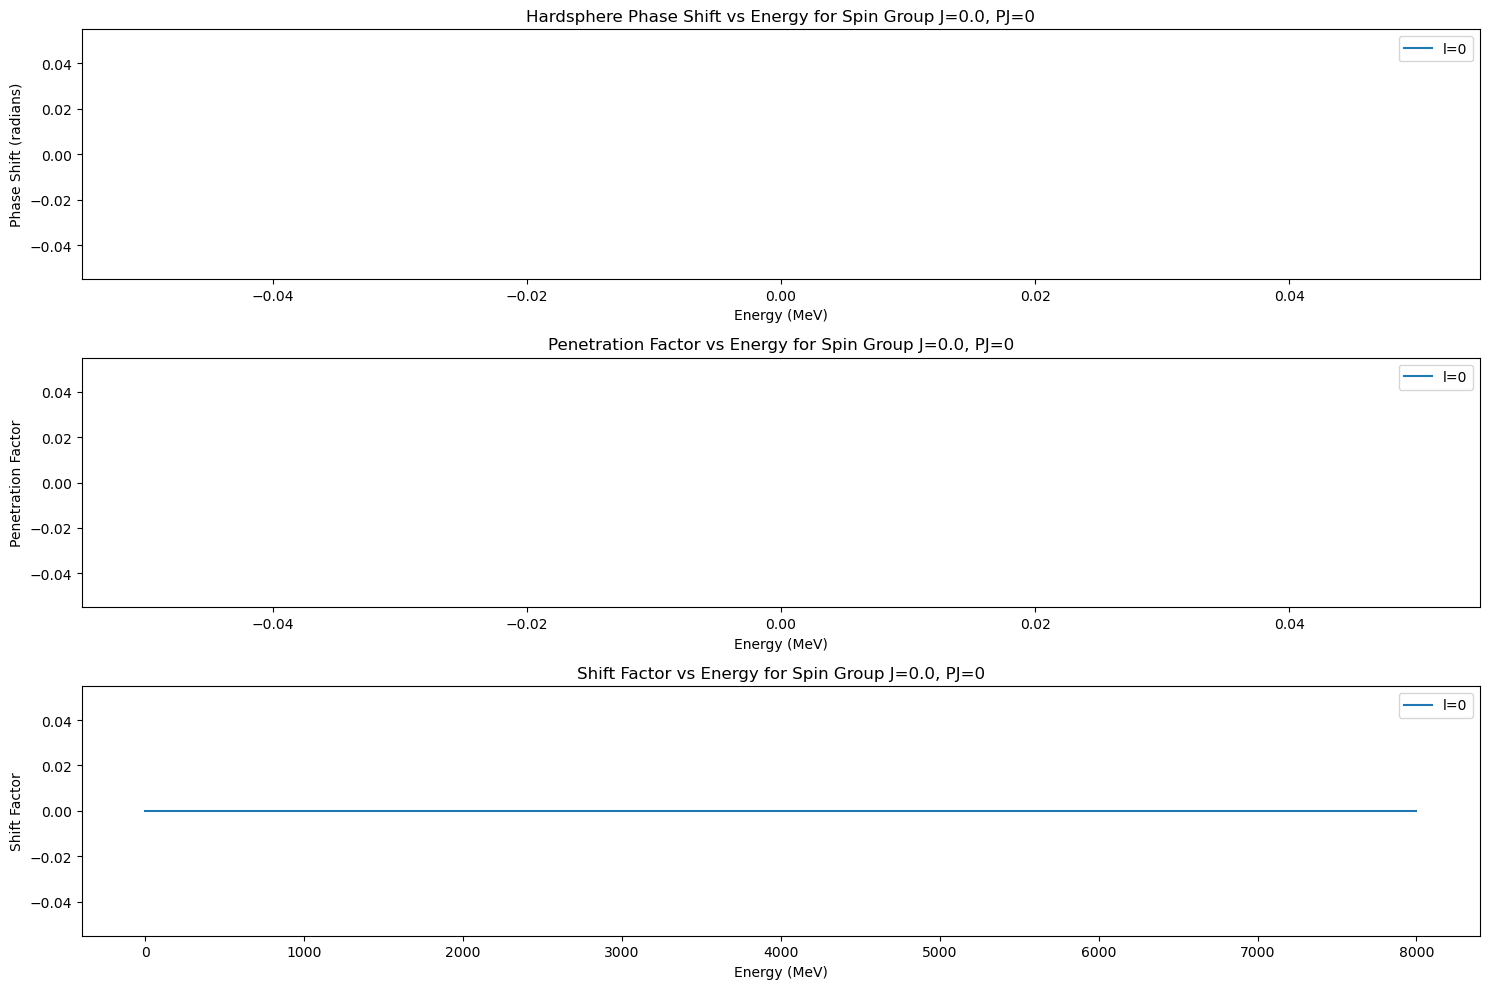

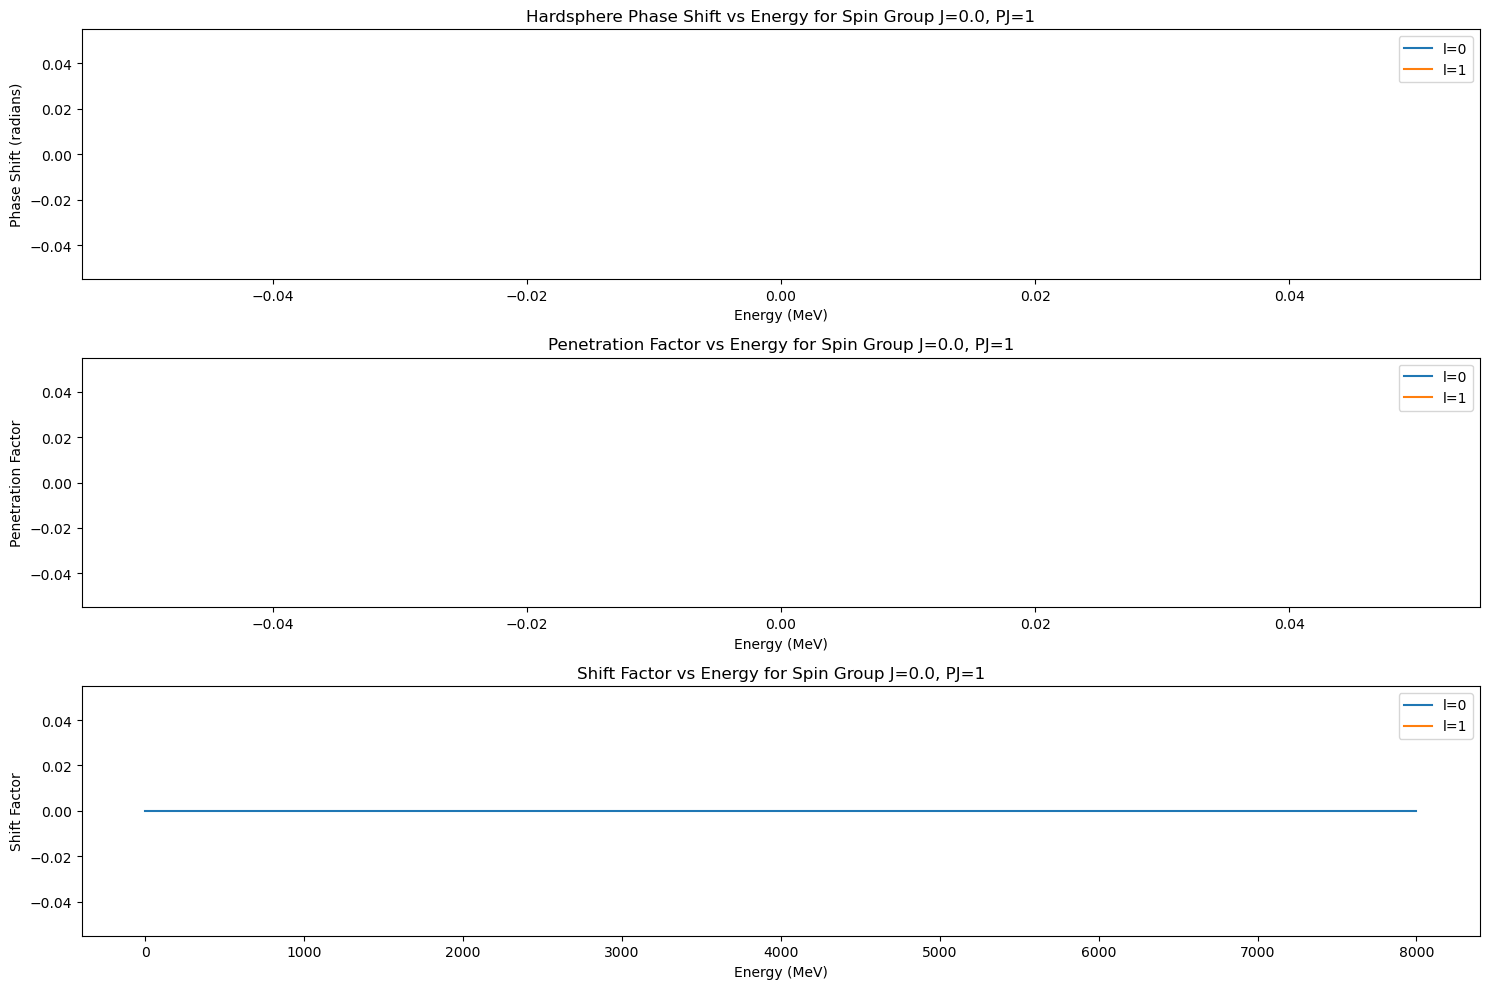

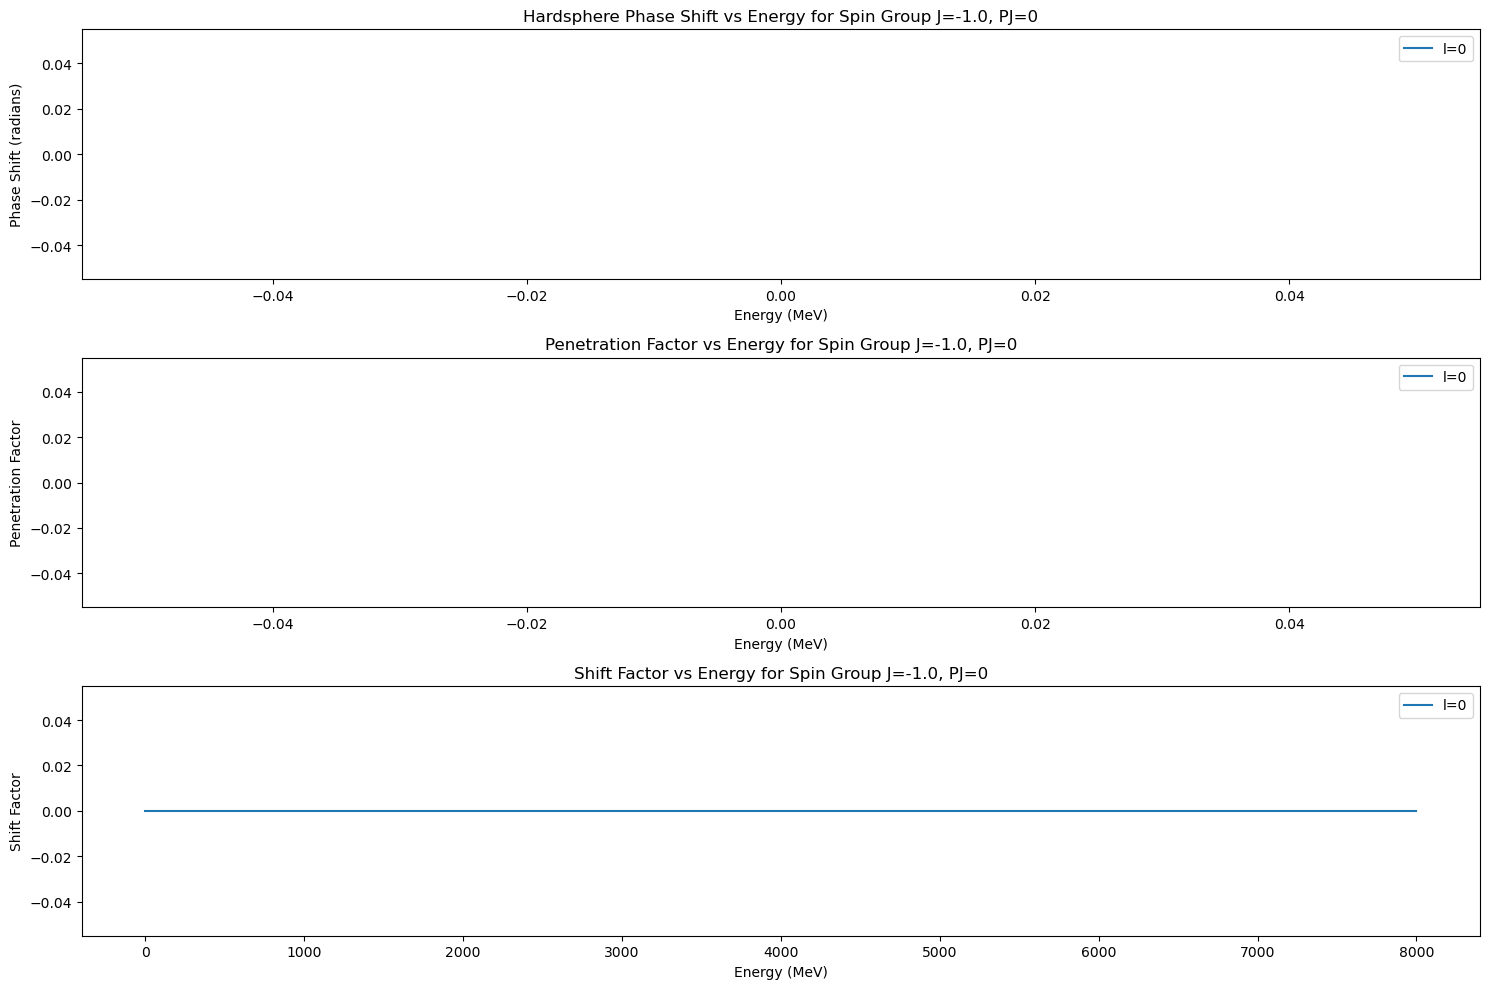

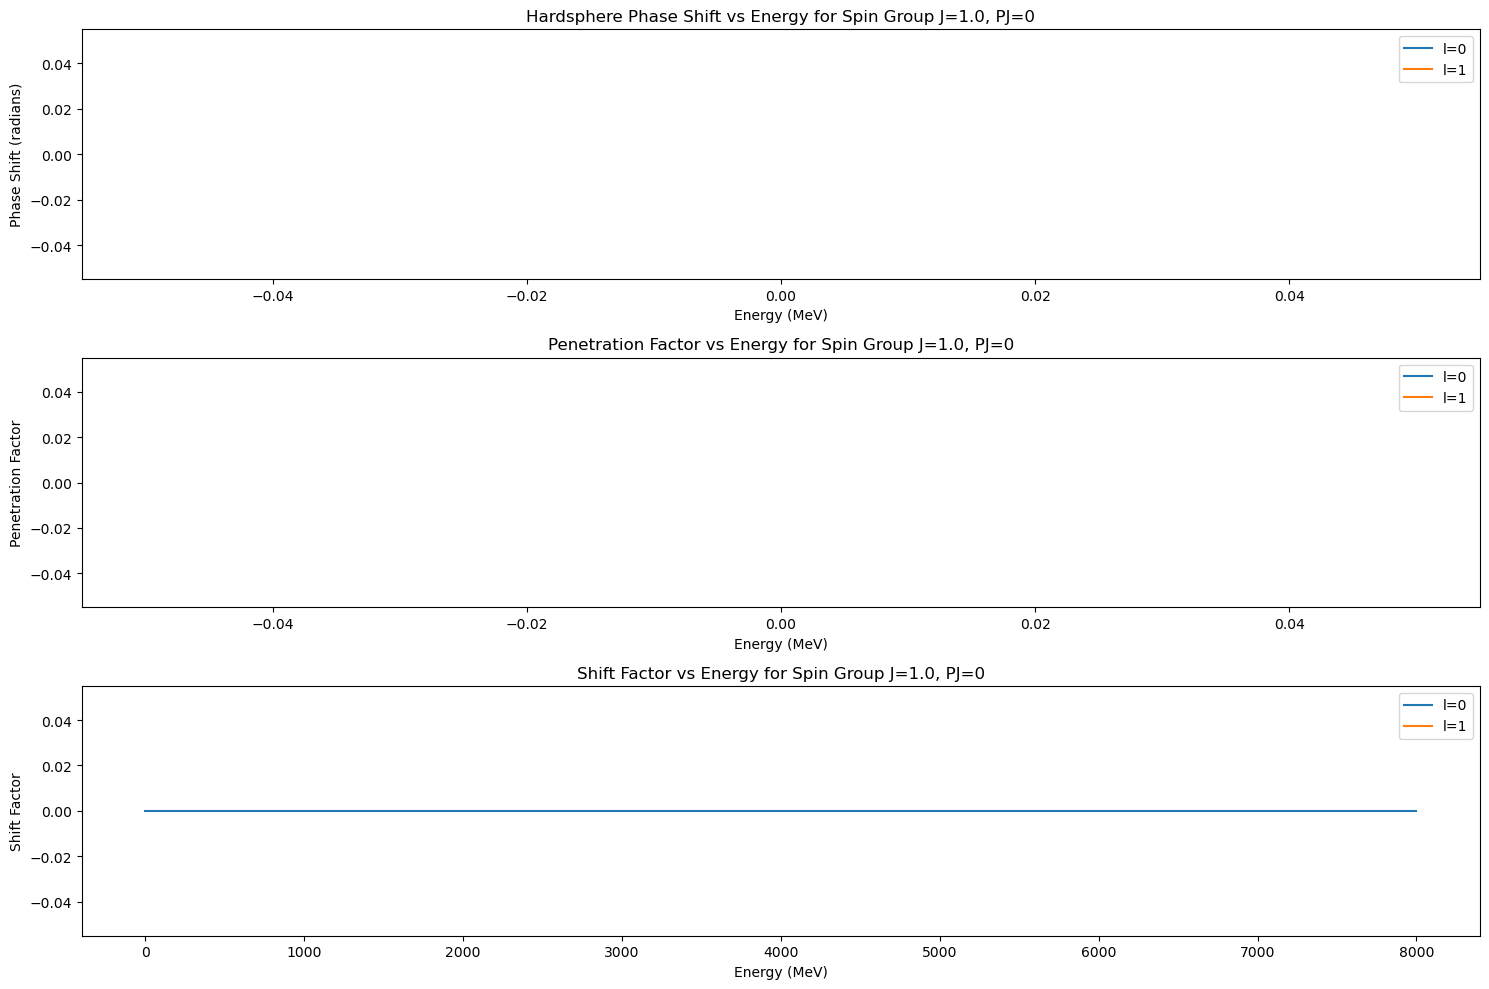

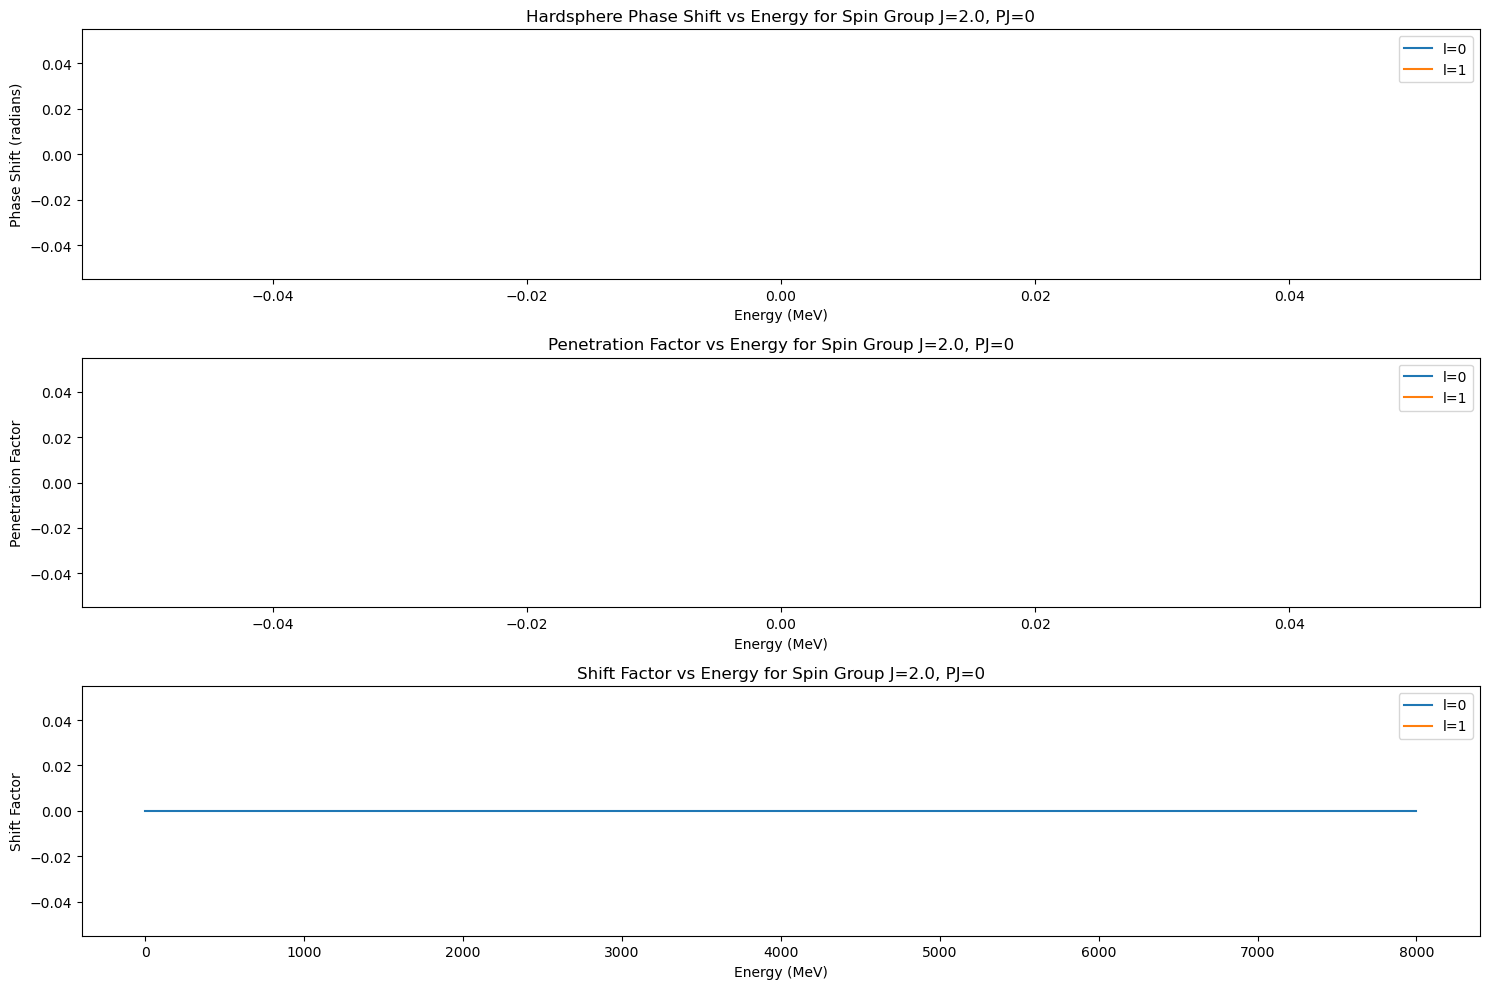

In [3]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/mycodes/pyrat/build1/python')
import pyrat
import matplotlib.pyplot as plt

# Assume 'data' dictionary is prepared as before

# Prepare ParticlePair instances
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = pyrat.ParticlePair(
        float(resonance_range.parameters.particle_pairs.MA[ipp]), float(resonance_range.parameters.particle_pairs.MB[ipp]),
        float(resonance_range.parameters.particle_pairs.IA[ipp]), float(resonance_range.parameters.particle_pairs.IB[ipp]),
        float(resonance_range.parameters.particle_pairs.Q[ipp]),
        int(resonance_range.parameters.particle_pairs.PA[ipp]), int(resonance_range.parameters.particle_pairs.PB[ipp]),
        int(resonance_range.parameters.particle_pairs.MT[ipp])
    )
    particle_pairs.append(particle_pair)

# Prepare SpinGroup instances
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = pyrat.SpinGroup(
        float(resonance_range.parameters.spin_groups[iJP].AJ),
        int(resonance_range.parameters.spin_groups[iJP].PJ)
    )

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH):
        channel = pyrat.Channel(
            particle_pairs[resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH] - 1],
            resonance_range.parameters.spin_groups[iJP].channels.L[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APT[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH]
        )
        spin_group.addChannel(channel)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = pyrat.Resonance(
            resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        )
        spin_group.addResonance(resonance)

    spin_groups.append(spin_group)

# Define energy range
energies = np.linspace(resonance_range.EL, resonance_range.EH, 1000)  # Energies in MeV

# Plot the results for each spin group
for spin_group in spin_groups:
    # Compute Phase Shift, Penetration Factor, and Shift Factor for each channel
    phase_shifts = {ch.getL(): [ch.PhaseShift(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}
    penetration_factors = {ch.getL(): [ch.PenetrationFactor(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}
    shift_factors = {ch.getL(): [ch.ShiftFactor(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Plot Phase Shift
    plt.subplot(3, 1, 1)
    for l, shifts in phase_shifts.items():
        plt.plot(energies, shifts, label=f'l={l}')
    plt.title(f'Hardsphere Phase Shift vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Phase Shift (radians)')
    plt.legend()

    # Plot Penetration Factor
    plt.subplot(3, 1, 2)
    for l, factors in penetration_factors.items():
        plt.plot(energies, factors, label=f'l={l}')
    plt.title(f'Penetration Factor vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Penetration Factor')
    plt.legend()

    # Plot Shift Factor
    plt.subplot(3, 1, 3)
    for l, shifts in shift_factors.items():
        plt.plot(energies, shifts, label=f'l={l}')
    plt.title(f'Shift Factor vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Shift Factor')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [3]:
# Assume 'data' dictionary and 'A' value are prepared as before
calculator = pyrat.CrossSectionCalculator(data, A)

energies = [1] # , 0.5, 1.0, 1.5, 2.0]  # Energies in MeV

# Compute cross sections for the specified reaction channel
reaction_channel = "(n,n)"  # or "(n,n)", "(n,g)", etc.
cross_sections = calculator.computeCrossSections(energies, reaction_channel)

# Now, 'cross_sections' is a list of cross section values corresponding to the 'energies' list
# for E, sigma in zip(energies, cross_sections):
#     print(f"Energy: {E} MeV, Cross Section: {sigma} barns")

E=1
Spingroup=0^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=0^1  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=-1^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=1^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 3 3
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=2^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
